Recep Yusuf Bekci 260858044

In [0]:
import numpy as np
np.random.seed(seed=1453)
K = 10
arms = np.random.normal(loc=0.0, scale=1.0, size=K)
def bandit(act):
  return np.random.normal(loc=arms[act], scale=1.0)
regrets = np.max(arms) - arms

In [0]:
arms

array([ 0.48123254,  1.86990135,  0.42310131, -0.27614443,  1.202765  ,
       -1.38431592,  1.15206824, -0.30057505, -1.26482673,  1.89178201])

In [0]:
def ucb(c, steps):
  N, Q = np.zeros(K), np.zeros(K)
  t = 0 # time
  av_returns = []
  R_ort = 0
  aver_regret = []
  tot_regret = []
  test_rewards = []
  rr = []
  for i in range(steps):
    if t>K-1:
      A = np.argmax(Q + c*np.sqrt(np.log(t)/N))
    else: 
      A = t    
    t += 1
    R = bandit(A)
    N[A] += 1 # Pull count of arc A
    Q[A] += (R - Q[A])/N[A] # Mean reward of arc A
    R_ort += (R-R_ort)/t # Overall mean reward
    av_returns.append(R_ort)
    aver_regret.append(np.dot(N,regrets).sum()/t) # Overall average regret per step
    tot_regret.append(np.dot(N,regrets).sum()) # Total cumulative regret
    rr.append(R)
    if i%10 == 0:
      test = 0
      for g in range(5):
        A = np.argmax(Q + c*np.sqrt(np.log(t)/N))
        test += bandit(A)
      test_rewards.append(test/5)
  return av_returns, aver_regret, test_rewards

In [0]:
import matplotlib.pyplot as plt

In [0]:
def grad(alpha, steps):
  # Extra
  H = np.zeros(K)
  N, Q = np.zeros(K), np.zeros(K)
  R_ort = 0
  t = 0
  av_returns = []
  aver_regret = []
  tot_regret = []
  test_rewards = []
  for i in range(steps):
    p_a = np.exp(H)/np.exp(H).sum()
    A = np.argmax(p_a)
    R = bandit(A)
    N[A] += 1
    t += 1
    for j in range(K):
      if A == j:
        H[j] += alpha*(R-R_ort)*(1-p_a[A])
      else:
        H[j] -= alpha*(R-R_ort)*(1-p_a[j])
    R_ort += (R-R_ort)/t
    av_returns.append(R_ort)
    aver_regret.append(np.dot(N,regrets).sum()/t) # Overall average regret per step
    tot_regret.append(np.dot(N,regrets).sum()) # Total cumulative regret
    if i%10 == 0:
      test = 0
      for g in range(5):
        A = np.argmax(p_a)
        test += bandit(A)
      test_rewards.append(test/5)
  return av_returns, aver_regret, test_rewards, N

In [0]:
def soft(temp, steps, cool=False):
  prior_optimistic = np.ones(10)*2
  N, Q = np.zeros(K), np.zeros(K)
  R_ort = 0
  t = 0
  av_returns = []
  aver_regret = []
  tot_regret = []
  test_rewards = []
  for i in range(steps):
    potential_rewards = np.exp(prior_optimistic/temp)/np.exp(prior_optimistic/temp).sum()
    A = np.argmax(potential_rewards)
    R = bandit(A)
    N[A] += 1
    t += 1
    R_ort += (R-R_ort)/t
    av_returns.append(R_ort)
    aver_regret.append(np.dot(N,regrets).sum()/t) # Overall average regret per step
    tot_regret.append(np.dot(N,regrets).sum()) # Total cumulative regret
    prior_optimistic[A] = prior_optimistic[A] + (R- prior_optimistic[A])/(i+1)
    if cool:
      temp = temp - 0.8**i
    if i%10 == 0:
      test = 0
      for g in range(5):
        A = np.argmax(potential_rewards)
        test += bandit(A)
      test_rewards.append(test/5)
  return av_returns, aver_regret, test_rewards

In [0]:
def thompson(mu_0, steps):
  mu = np.array([mu_0]*K)
  sigma = np.ones(K)
  N, Q = np.zeros(K), np.zeros(K)
  R_ort = 0
  t = 0
  av_returns = []
  aver_regret = []
  tot_regret = []
  test_rewards = []
  for i in range(steps):
    samples = []
    for j in range(K):
      samples.append(np.random.normal(loc=mu[j], scale=sigma[j], size=1))
    A = np.argmax(samples)
    R = bandit(A)
    N[A] += 1
    Q[A] += R
    mu[A] = (mu[A]+Q[A])/(N[A]+1)
    sigma[A] = 1/(N[A]+1)
    t += 1
    R_ort += (R-R_ort)/t
    av_returns.append(R_ort) 
    aver_regret.append(np.dot(N,regrets).sum()/t) # Overall average regret per step
    tot_regret.append(np.dot(N,regrets).sum()) # Total cumulative regret
    if i%10 == 0:
      test = 0
      for g in range(5):
        test_samples = []
        for k in range(K):
          test_samples.append(np.random.normal(loc=mu[k], scale=sigma[k], size=1))
        A = np.argmax(test_samples)
        test += bandit(A)
      test_rewards.append(test/5)

  return av_returns, aver_regret, test_rewards

# Hyperparameter Tuning

In [0]:
hys = []
for c in range(10):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = ucb(c,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


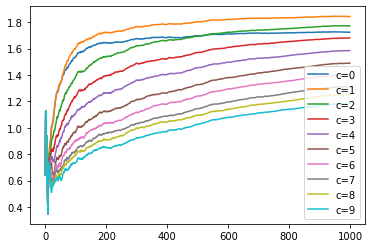

In [0]:
for c in range(10):
  plt.plot(hys[c], label='c='+str(c))
plt.legend()

In [0]:
hys = []
for c in range(15):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = ucb(c/10,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


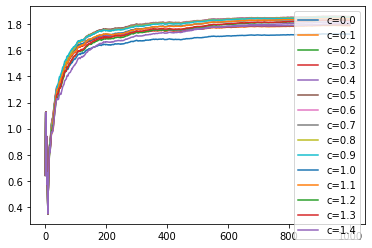

In [0]:
for c in range(15):
  plt.plot(hys[c], label='c='+str(c/10))
plt.legend()

In [0]:
for c in range(15):
  print('c='+str(c/10)+':Reward='+str(max(hys[c])))

c=0.0:Reward=1.726617690150303
c=0.1:Reward=1.7911497873730453
c=0.2:Reward=1.796816197885788
c=0.3:Reward=1.796095318935413
c=0.4:Reward=1.8048814282009715
c=0.5:Reward=1.8607718696264772
c=0.6:Reward=1.8606152196933146
c=0.7:Reward=1.8581312434377897
c=0.8:Reward=1.8583638451206301
c=0.9:Reward=1.8546894096937028
c=1.0:Reward=1.8445360087010616
c=1.1:Reward=1.845309475105123
c=1.2:Reward=1.830538745809886
c=1.3:Reward=1.8322763209434374
c=1.4:Reward=1.8180143359191525


So, we select c as $0.6$ for UCB.

In [0]:
hys = []
for temp in range(10):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = soft(temp*1000,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


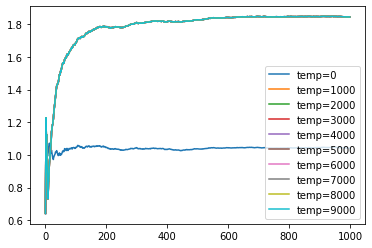

In [0]:
for temp in range(10):
  plt.plot(hys[temp], label='temp='+str(temp*1000))
plt.legend()

In [0]:
for temp in range(10):
  print('temp='+str(temp*1000)+':Reward='+str(max(hys[temp])))

temp=0:Reward=1.0718784782921549
temp=1000:Reward=1.8482416230923284
temp=2000:Reward=1.8482416230923284
temp=3000:Reward=1.8482416230923284
temp=4000:Reward=1.8482416230923284
temp=5000:Reward=1.8482416230923284
temp=6000:Reward=1.8482416230923284
temp=7000:Reward=1.8482416230923284
temp=8000:Reward=1.8482416230923284
temp=9000:Reward=1.8482416230923284


So, temperature doesn't make that much difference.

So, we select $temp$ as  2000  for Softmax.


In [0]:
hys = []
for mu in range(10):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = thompson(mu,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

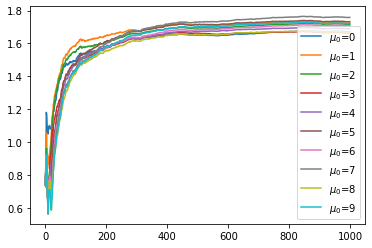

In [0]:
for mu in range(10):
  plt.plot(hys[mu], label='$\mu_0$='+str(mu))
plt.legend()

In [0]:
hys = []
for mu in range(10):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = thompson(mu/10,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

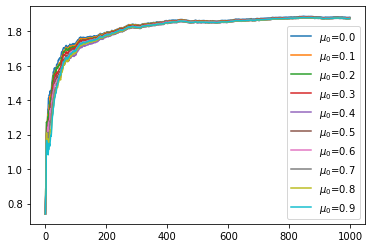

In [0]:
for mu in range(10):
  plt.plot(hys[mu], label='$\mu_0$='+str(mu/10))
plt.legend()

In [0]:
for mu in range(10):
  print('mu='+str(mu/10)+':Reward='+str(max(hys[mu])))

mu=0.0:Reward=1.8869175466541104
mu=0.1:Reward=1.883507520498134
mu=0.2:Reward=1.8813859118330345
mu=0.3:Reward=1.8819289146883773
mu=0.4:Reward=1.877783820804633
mu=0.5:Reward=1.8798310752300627
mu=0.6:Reward=1.88079570252121
mu=0.7:Reward=1.8781564611175512
mu=0.8:Reward=1.8785027400850336
mu=0.9:Reward=1.8799343992427127


In [0]:
hys = []
for mu in range(10):
  tot = np.zeros(1000)
  for i in range(10): # 10 runs 
    np.random.seed(seed=1453*i)
    aver_regret, _, _ = thompson(-mu/10,1000)
    tot += aver_regret
  ass = tot/10
  hys.append(ass)

In [0]:
for mu in range(10):
  print('mu='+str(-mu/10)+':Reward='+str(max(hys[mu])))

mu=0.0:Reward=1.8869175466541104
mu=-0.1:Reward=1.88583411314591
mu=-0.2:Reward=1.887564749345453
mu=-0.3:Reward=1.8902028635895731
mu=-0.4:Reward=1.8879271090279695
mu=-0.5:Reward=1.888630128091767
mu=-0.6:Reward=1.879511349588391
mu=-0.7:Reward=1.880627065514468
mu=-0.8:Reward=1.8788632171091204
mu=-0.9:Reward=1.8791541219605477


So, we select  prior mean  as -0.3 for Thompson.

# Graphs

In [0]:
ucb_regret, soft_regret, thomp_regret = np.zeros(1000), np.zeros(1000), np.zeros(1000)
ucb_reward, soft_reward, thomp_reward = np.zeros(1000), np.zeros(1000), np.zeros(1000)
ucb_reward_t, soft_reward_t, thomp_reward_t = np.zeros(100), np.zeros(100), np.zeros(100)
for i in range(10): # 10 runs 
  np.random.seed(seed=44*i)
  av_returns, aver_regret, test_rewards = ucb(0.4,1000)
  ucb_regret += aver_regret
  ucb_reward += av_returns
  ucb_reward_t += test_rewards

  av_returns, aver_regret, test_rewards = soft(2.2,1000)
  soft_regret += aver_regret
  soft_reward += av_returns
  soft_reward_t += test_rewards

  av_returns, aver_regret, test_rewards = thompson(-0.7,1000)
  thomp_regret += aver_regret
  thomp_reward += av_returns
  thomp_reward_t += test_rewards
  
ucb_regret /= 10 
soft_regret /= 10 
thomp_regret /=10
ucb_reward /= 10 
soft_reward /= 10 
thomp_reward /= 10
ucb_reward_t /= 10
soft_reward_t /= 10
thomp_reward_t /= 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


true_divide warning is because testing of ucb right after 10th pull. 


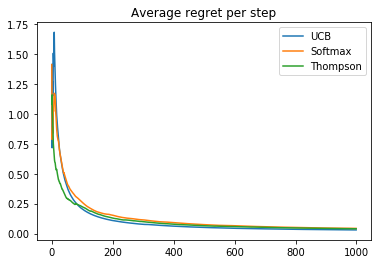

In [0]:
plt.plot(ucb_regret, label='UCB')
plt.plot(soft_regret, label='Softmax')
plt.plot(thomp_regret, label='Thompson')
plt.title('Average regret per step')
plt.legend()

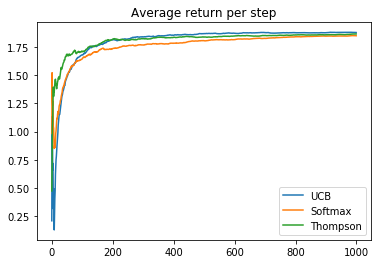

In [0]:
plt.plot(ucb_reward, label='UCB')
plt.plot(soft_reward, label='Softmax')
plt.plot(thomp_reward, label='Thompson')
plt.title('Average return per step')
plt.legend()

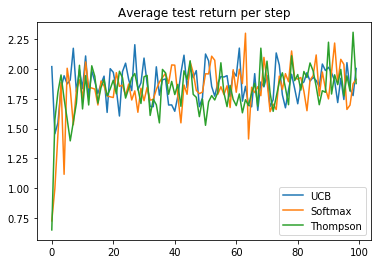

In [0]:
plt.plot(ucb_reward_t, label='UCB')
plt.plot(soft_reward_t, label='Softmax')
plt.plot(thomp_reward_t, label='Thompson')
plt.title('Average test return per step')
plt.legend()

Both algorithms worked pretty much well, however, looking to average regret per step and average reward per step plots, we can say that Thompson sampling slightly overperformed the others. I was expecting that also. I expected that Thompson samplings performance would be better than UCB, but I couldn't put Softmax anywhere between them. One thing that suprized me is that the algorithms were not highly sensitive to the hyperparameters.
